In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/car.csv")


In [ ]:
input_features = df.drop(['price'], axis=1)
target_feature = df['price']
print(input_features.head())
print(target_feature.head())

       model  year transmission  mileage fuelType  tax   mpg  engineSize
0   5 Series  2014    Automatic    67068   Diesel  125  57.6         2.0
1   6 Series  2018    Automatic    14827   Petrol  145  42.8         2.0
2   5 Series  2016    Automatic    62794   Diesel  160  51.4         3.0
3   1 Series  2017    Automatic    26676   Diesel  145  72.4         1.5
4   7 Series  2014    Automatic    39554   Diesel  160  50.4         3.0
0    11200
1    27000
2    16000
3    12750
4    14500
Name: price, dtype: int64


In [ ]:
print(df.isna().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [ ]:
labelEncoder = LabelEncoder()
categorical_columns = ['transmission', 'fuelType', 'model']
for col in categorical_columns:
    input_features[col] = labelEncoder.fit_transform(input_features[col])

print(input_features.head())

   model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0      4  2014             0    67068         0  125  57.6         2.0
1      5  2018             0    14827         4  145  42.8         2.0
2      4  2016             0    62794         0  160  51.4         3.0
3      0  2017             0    26676         0  145  72.4         1.5
4      6  2014             0    39554         0  160  50.4         3.0


In [ ]:
imputer = SimpleImputer(strategy='mean')
input_features = pd.DataFrame(imputer.fit_transform(input_features), columns=input_features.columns)

In [ ]:
input_features = input_features.astype(float)
target_feature = target_feature.astype(float)

In [ ]:
scaler = StandardScaler()
input_features = pd.DataFrame(scaler.fit_transform(input_features), columns=input_features.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_features, target_feature, test_size=0.2, random_state=42)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'k-NN Regression': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results[name] = {
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test),
        'Train RMSE': mean_squared_error(y_train, y_pred_train, squared=False),
        'Test RMSE': mean_squared_error(y_test, y_pred_test, squared=False),
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test)
    }


In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                             Train MAE     Test MAE     Train MSE  \
Linear Regression          3920.126380  3996.758387  3.323658e+07   
Ridge Regression           3920.044812  3996.682964  3.323658e+07   
Lasso Regression           3919.870473  3996.523760  3.323659e+07   
Decision Tree                25.113729  2058.827986  6.660553e+04   
Random Forest               577.141570  1633.874101  1.019273e+06   
Support Vector Regression  7726.403938  7742.919141  1.270960e+08   
k-NN Regression            1393.927226  1796.279926  6.066914e+06   
Gradient Boosting          1786.362029  1951.314401  7.958026e+06   

                               Test MSE    Train RMSE     Test RMSE  Train R²  \
Linear Regression          3.348616e+07   5765.117308   5786.722547  0.745369   
Ridge Regression           3.348652e+07   5765.117387   5786.753879  0.745369   
Lasso Regression           3.348704e+07   5765.118307   5786.798908  0.745369   
Decision Tree              1.107155e+07    258.080469 

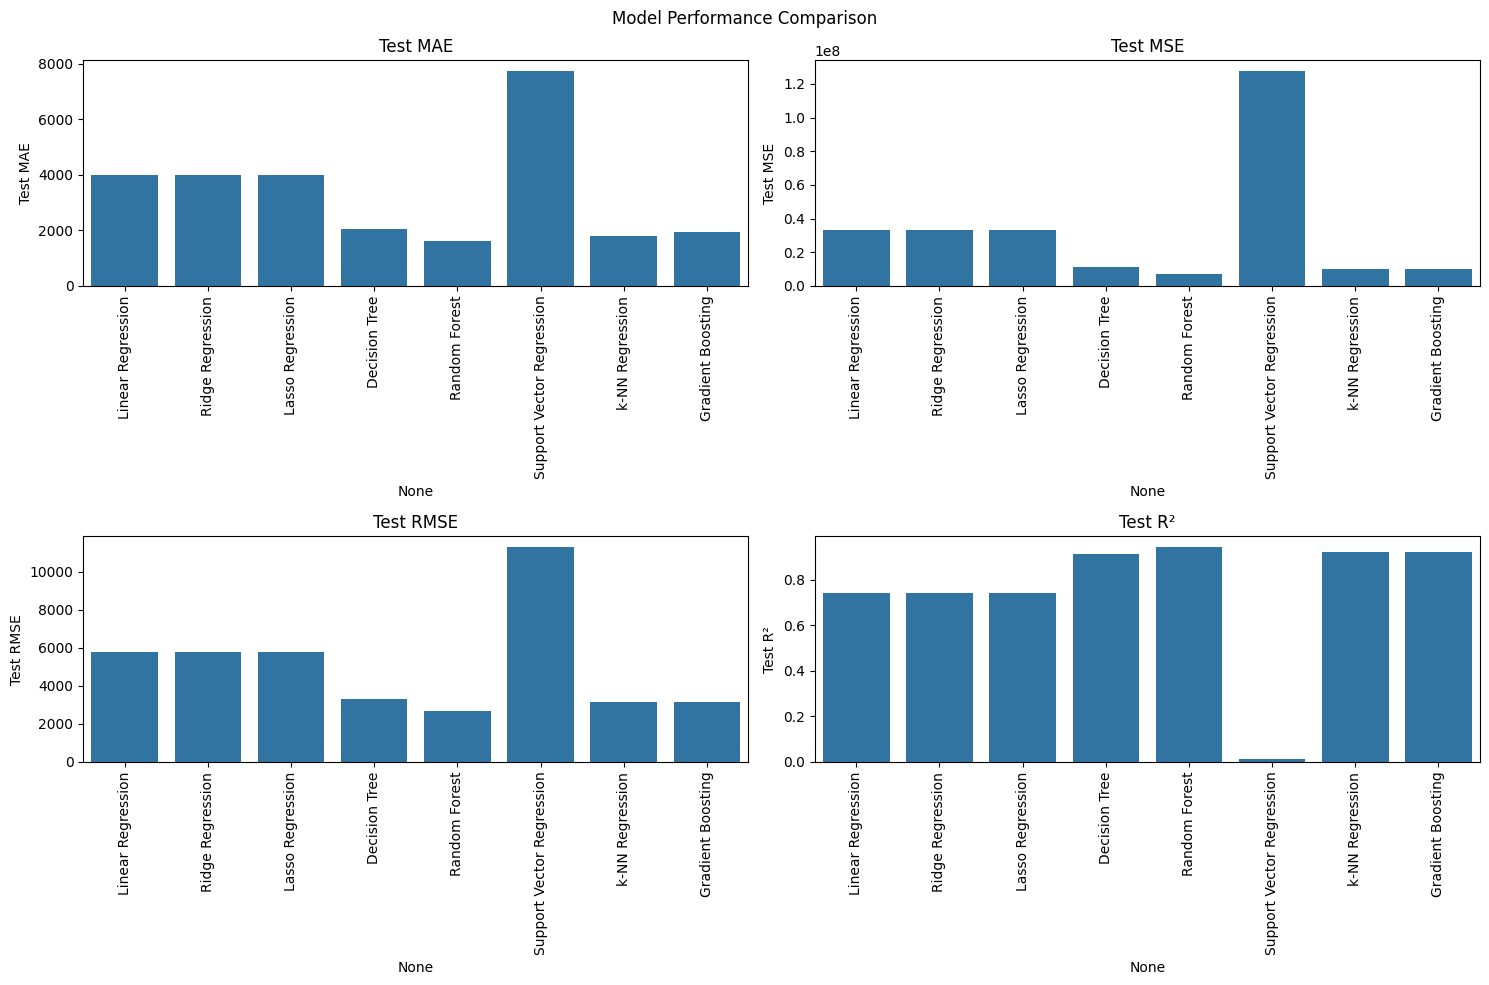

In [ ]:
!pip install seaborn
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison')

sns.barplot(x=results_df.index, y='Test MAE', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('Test MAE')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x=results_df.index, y='Test MSE', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('Test MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x=results_df.index, y='Test RMSE', data=results_df, ax=axes[1, 0])
axes[1, 0].set_title('Test RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.barplot(x=results_df.index, y='Test R²', data=results_df, ax=axes[1, 1])
axes[1, 1].set_title('Test R²')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
best_model_name = results_df['Test RMSE'].idxmin()
best_model = models[best_model_name]
y_pred_test_best = best_model.predict(X_test)

In [ ]:
results_best_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_best})
print(f"Best Model: {best_model_name}")
print(results_best_model.head())
#Heres the best model

Best Model: Random Forest
       Actual  Predicted
8728  15300.0   14071.18
761   15495.0   12499.72
7209  39875.0   40877.28
6685  21730.0   23037.23
8548  13799.0   17027.33


In [ ]:
results_best_model.to_csv('best_model_results.csv', index=False)
results_df.to_csv('/content/model_comparison_results.csv')